## Data Loading

feature engineering: Missing values, Non-Gaussian distributed variables, Outlier treatment, Categorical variables: convert strings to numbers, Standardize the values of the variables to the same range
Feature selection
Kmeans modelling
evaluation using F1, Accuracy
save model as a pickle file

In [1]:
import pandas as pd

data = pd.read_csv("/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
data.isnull().mean() * 100

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

## EDA

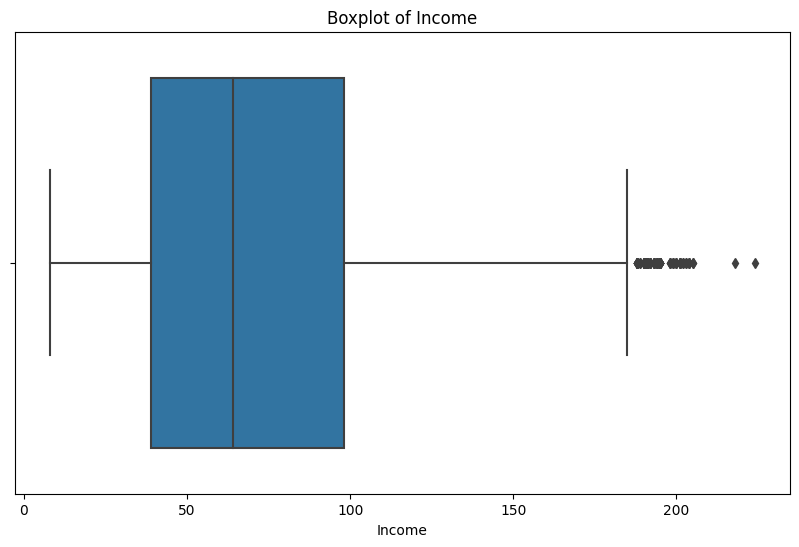

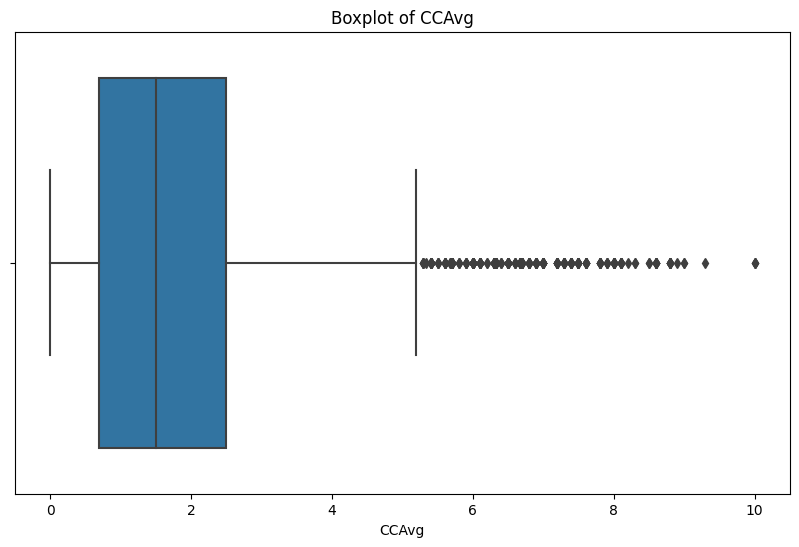

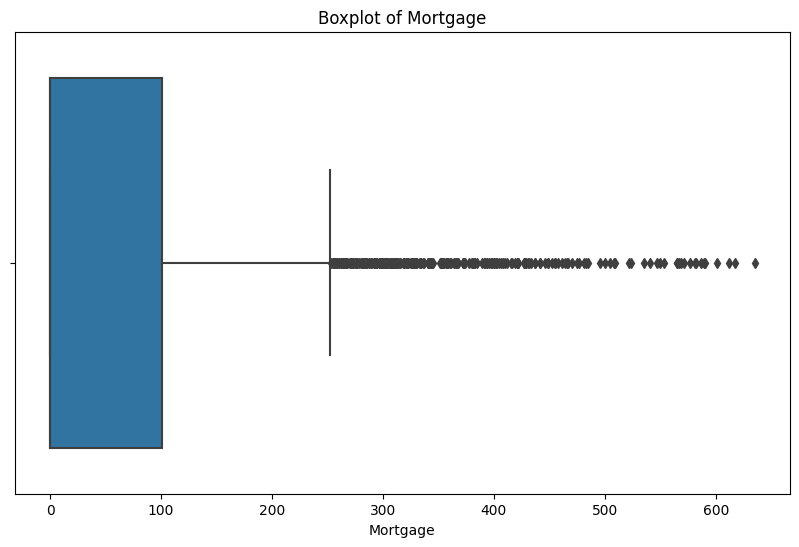

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in ['Income', 'CCAvg', 'Mortgage']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

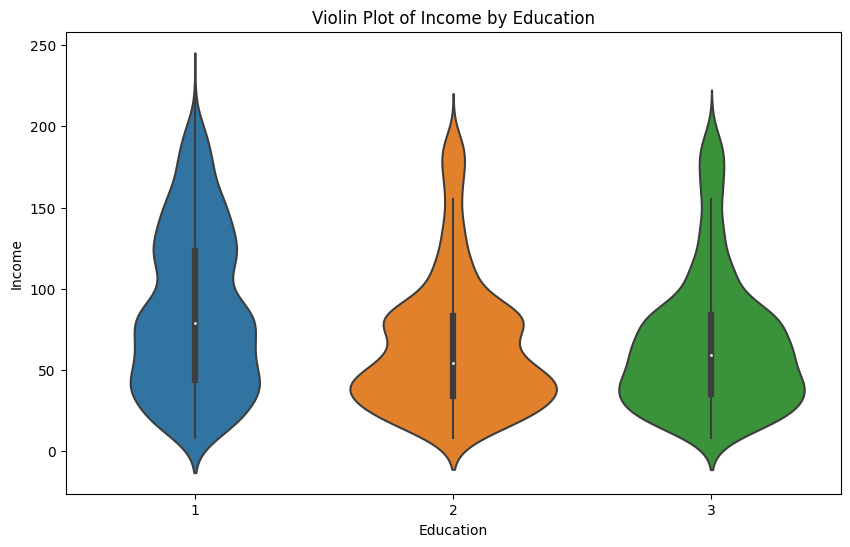

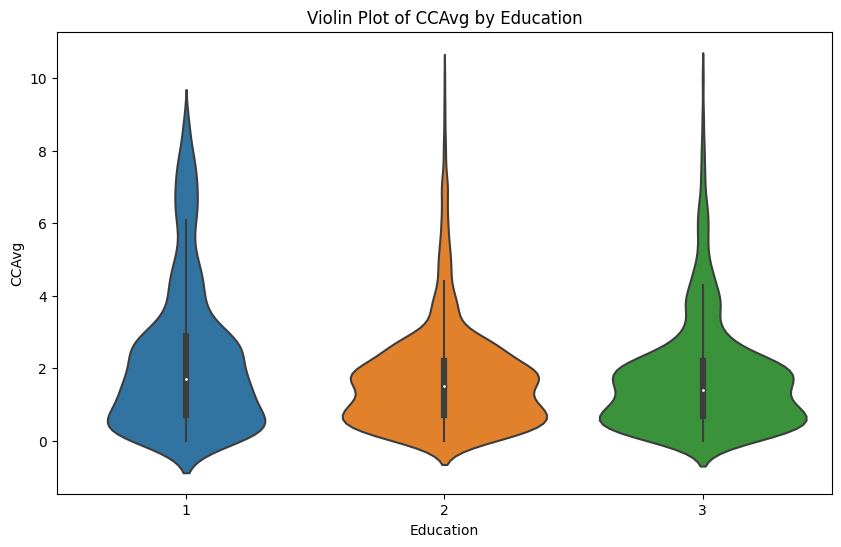

In [6]:
for column in ['Income', 'CCAvg']:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='Education', y=column)
    plt.title(f'Violin Plot of {column} by Education')
    plt.show()

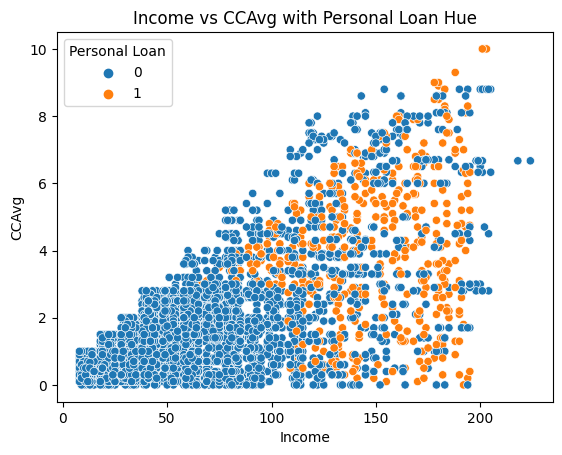

In [7]:
sns.scatterplot(data=data, x='Income', y='CCAvg', hue='Personal Loan')
plt.title('Income vs CCAvg with Personal Loan Hue')
plt.show()

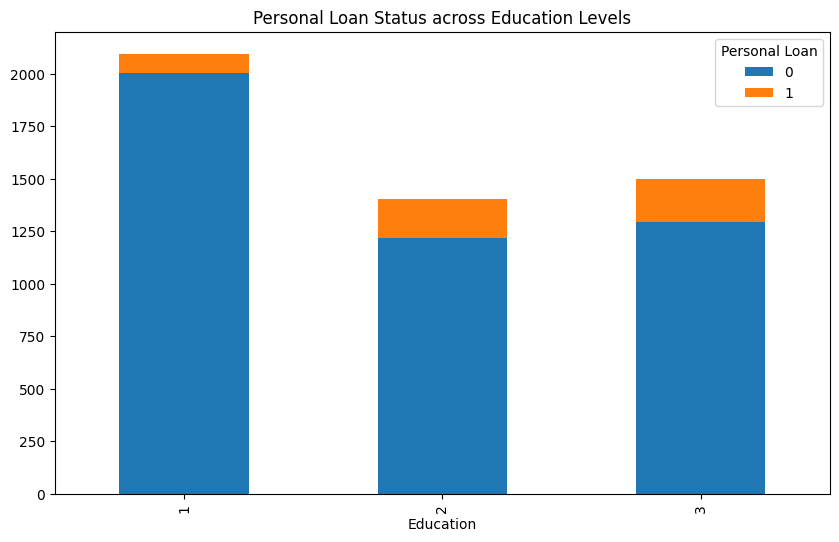

In [8]:
crosstab = pd.crosstab(data['Education'], data['Personal Loan'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Personal Loan Status across Education Levels')
plt.show()


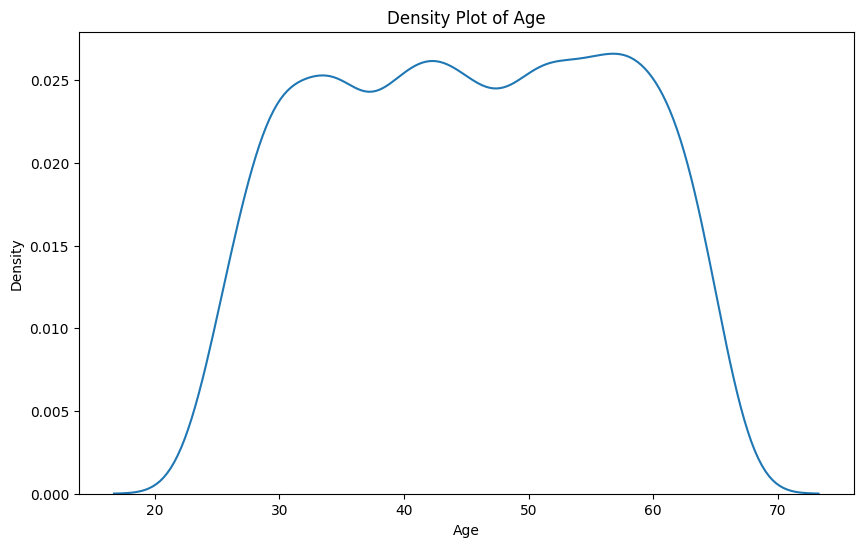

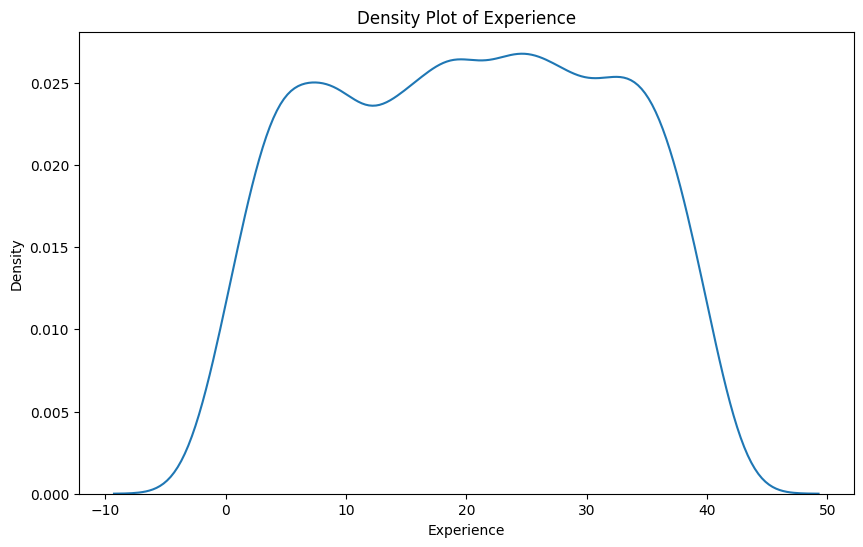

In [9]:
for column in ['Age', 'Experience']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=column)
    plt.title(f'Density Plot of {column}')
    plt.show()

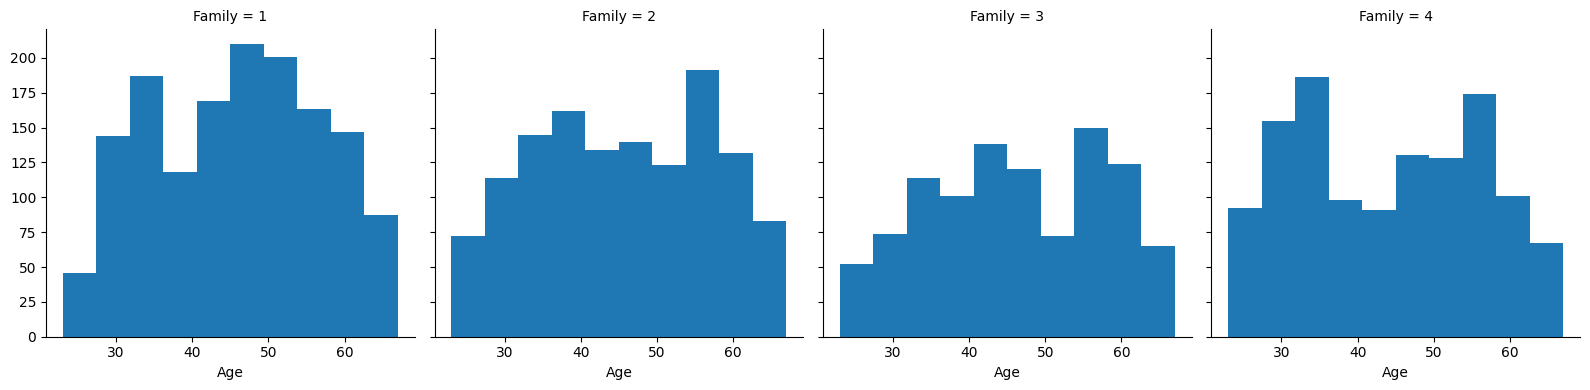

In [10]:
g = sns.FacetGrid(data, col='Family', col_wrap=4, height=4)
g.map(plt.hist, 'Age')
plt.show()

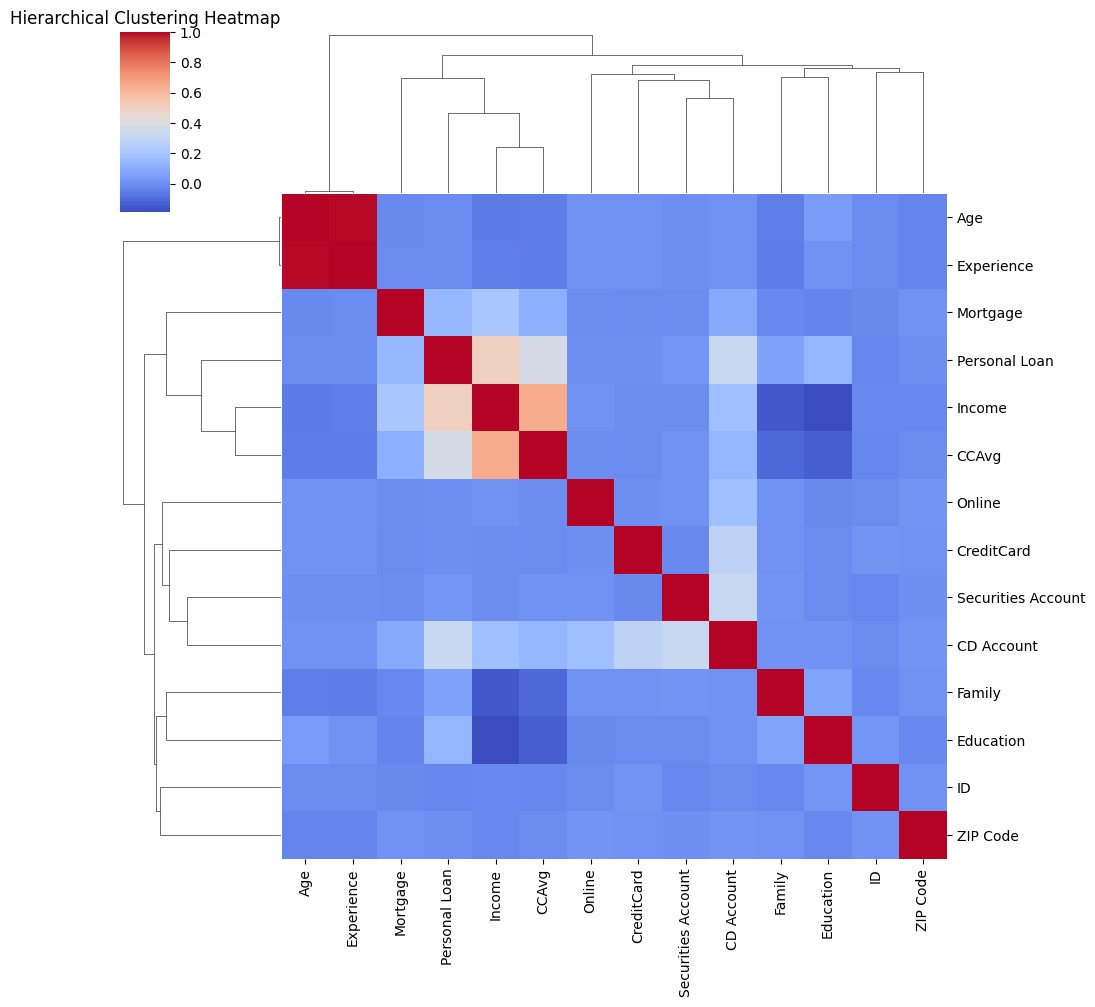

In [11]:
sns.clustermap(data.corr(), cmap='coolwarm', figsize=(10, 10))
plt.title('Hierarchical Clustering Heatmap')
plt.show()

In [12]:
import numpy as np
skewed_features = data.skew().sort_values(ascending=False)
highly_skewed = skewed_features[abs(skewed_features) > 1]

for col in highly_skewed.index:
    data[col] = np.log1p(data[col])

In [13]:
from scipy import stats

z_scores = np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64'])))
data = data[(z_scores < 3).all(axis=1)]

In [14]:
data = data.drop(columns=['ID', 'ZIP Code'])

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [16]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.0,4356.000000,4356.0,4356.000000,4356.000000
mean,45.364096,20.125574,66.187328,2.374656,0.869369,1.847567,1.515971,0.0,0.058240,0.0,0.581726,0.270661
std,11.455345,11.456084,40.482489,1.150706,0.500064,0.839165,2.323578,0.0,0.192316,0.0,0.493332,0.444352
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.470004,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,45.000000,20.000000,59.000000,2.000000,0.875469,2.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,55.000000,30.000000,84.000000,3.000000,1.193922,3.000000,4.584967,0.0,0.000000,0.0,1.000000,1.000000
max,67.000000,43.000000,205.000000,4.000000,2.282382,3.000000,6.455199,0.0,0.693147,0.0,1.000000,1.000000


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
X = data_scaled.drop('Personal Loan', axis=1)
y = data_scaled['Personal Loan']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

data_selected = pd.DataFrame(X_new, columns=selected_features)
data_selected.head()

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

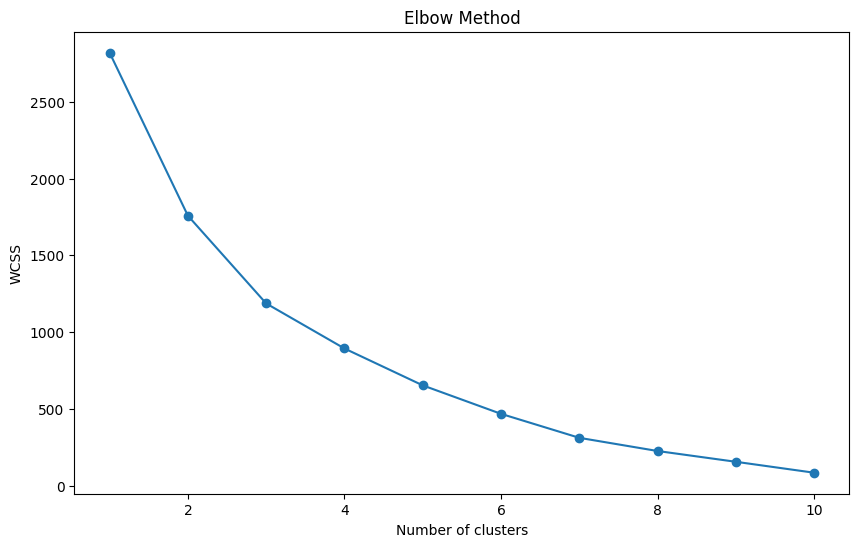

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_clustering = data_selected

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_clustering = data_selected

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_clustering)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_clustering, y_kmeans)
print(f'Silhouette Score for k=8: {silhouette_avg}')

Silhouette Score for k=8: 0.8549012691678053


In [37]:
import pickle
from sklearn.metrics import silhouette_score

pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))



In [38]:
kmeans_loaded = pickle.load(open("kmeans_model.pkl", "rb"))

silhouette_avg = silhouette_score(X_clustering, kmeans_loaded.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8549012691678053
